In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import collections
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter

Using TensorFlow backend.


# Reading Dataset

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().max()

0

### Classes are heavily skewed

In [7]:
print('Not fraud:',round((df['Class'].value_counts()/len(df['Class'])*100)[0],2),'%')
print('fraud:',round((df['Class'].value_counts()/len(df['Class'])*100)[1],2),'%')

Not fraud: 99.83 %
fraud: 0.17 %


* Very Imabalanced data, most of the transactions are non-fraud.

# Visualising the Data

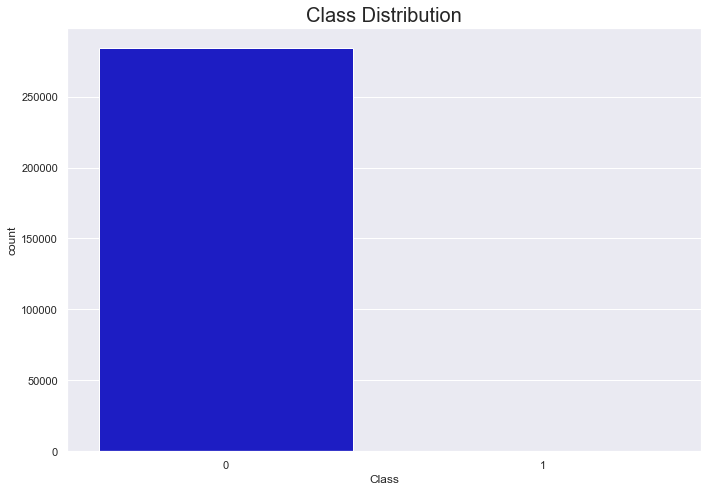

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='Class',data=df,palette=["#0101DF", "#DF0101"])
plt.title('Class Distribution',fontsize=20)
plt.tight_layout()
plt.show()

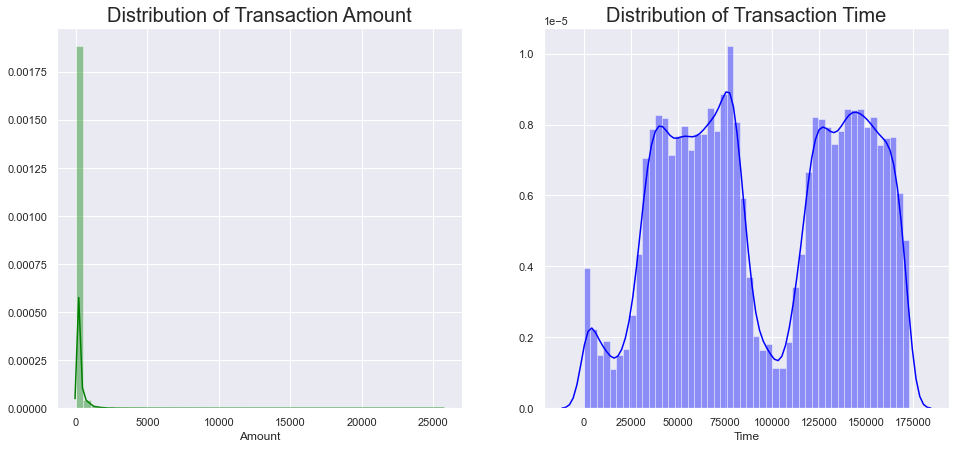

In [9]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.distplot(df['Amount'],color='green')
plt.title('Distribution of Transaction Amount',fontsize=20)
plt.subplot(122)
sns.distplot(df['Time'],color='blue')
plt.title('Distribution of Transaction Time',fontsize=20)
plt.show()

# Scaling and Distributing

* Firstly scaling the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not or we can to avoid overfitting and wrong correlations,subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions.

In [10]:
from sklearn.preprocessing import StandardScaler,RobustScaler
# robust scaler less prone to outliers
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['Scaled_Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis=1,inplace=True)

In [11]:
scaled_amount = df['Scaled_Amount']
scaled_time = df['Scaled_Time']

df.drop(['Scaled_Amount', 'Scaled_Time'], axis=1, inplace=True)
df.insert(0,'Scaled_Amount',scaled_amount)
df.insert(1,'Scaled_Time',scaled_time)
df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


* Splitting the dataset into train and test before undersampling or oversampling so that testing can be done on original test dataset

In [12]:
X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
for train_index,test_index in sss.split(X,y):
        print('Train: ',train_index,'Test: ',test_index)
        org_Xtrain,org_Xtest = X.iloc[train_index],X.iloc[test_index]
        org_ytrain,org_ytest = y.iloc[train_index],y.iloc[test_index]

# making the last split of data as original spliting for sometime but this will not we used as final result, for final the result
# testing will be done on all the splits and the mean will be taken as final result.
org_Xtrain = org_Xtrain.values
org_Xtest = org_Xtest.values
org_ytrain = org_ytrain.values
org_ytest = org_ytest.values
print('org_Xtrain: ',org_Xtrain.shape)
print('org_Xtest: ',org_Xtest.shape)
print('org_ytrain: ',org_ytrain.shape)
print('org_ytest: ',org_ytest.shape)

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]
org_Xtrain:  (227846, 30)
org_Xtest:  (56961, 30)
org_ytrain:  (227846,)
org_ytest:  (56961,)


# Random Under-Sampling:
* there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [13]:
df = df.sample(frac=1)
froud_df = df[df['Class']==1]
non_fraud_df = df[df['Class']==0][:492]
normal_distributed_df = pd.concat([froud_df,non_fraud_df])
new_df = normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
181738,-0.279606,0.637890,-0.316286,0.977216,-1.356228,-0.223701,3.588394,3.617427,0.937860,0.513525,...,0.147511,0.078381,0.543824,-0.237380,0.716109,0.040746,-0.408632,0.025678,0.015845,0
281674,0.286872,1.590592,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1
173527,-0.244673,0.562460,1.060922,0.438270,-0.060767,0.270677,-0.449046,-1.451422,0.217317,-1.179752,...,-0.329684,0.525228,-0.849875,0.318671,0.934529,0.103054,0.207756,0.017994,0.071359,0
50211,-0.293440,-1.061759,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,...,-0.346456,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1
143333,-0.307413,-0.200658,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,1


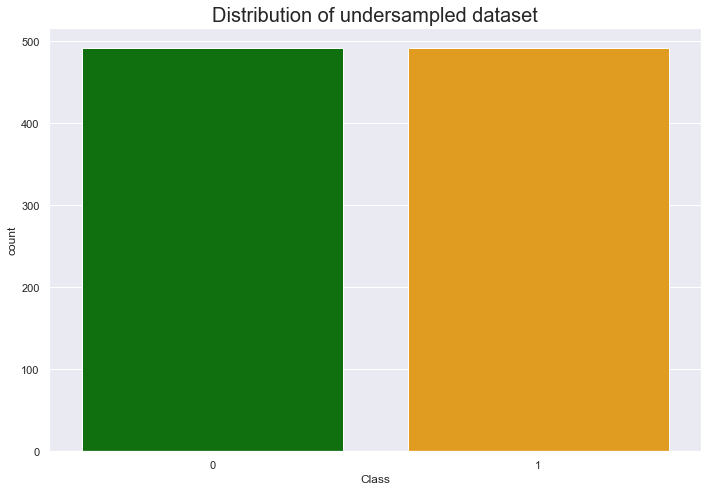

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='Class',data=new_df,palette=['green','orange'])
plt.title('Distribution of undersampled dataset',fontsize=20)
plt.tight_layout()
plt.show()

# Checking correlation of feature to class

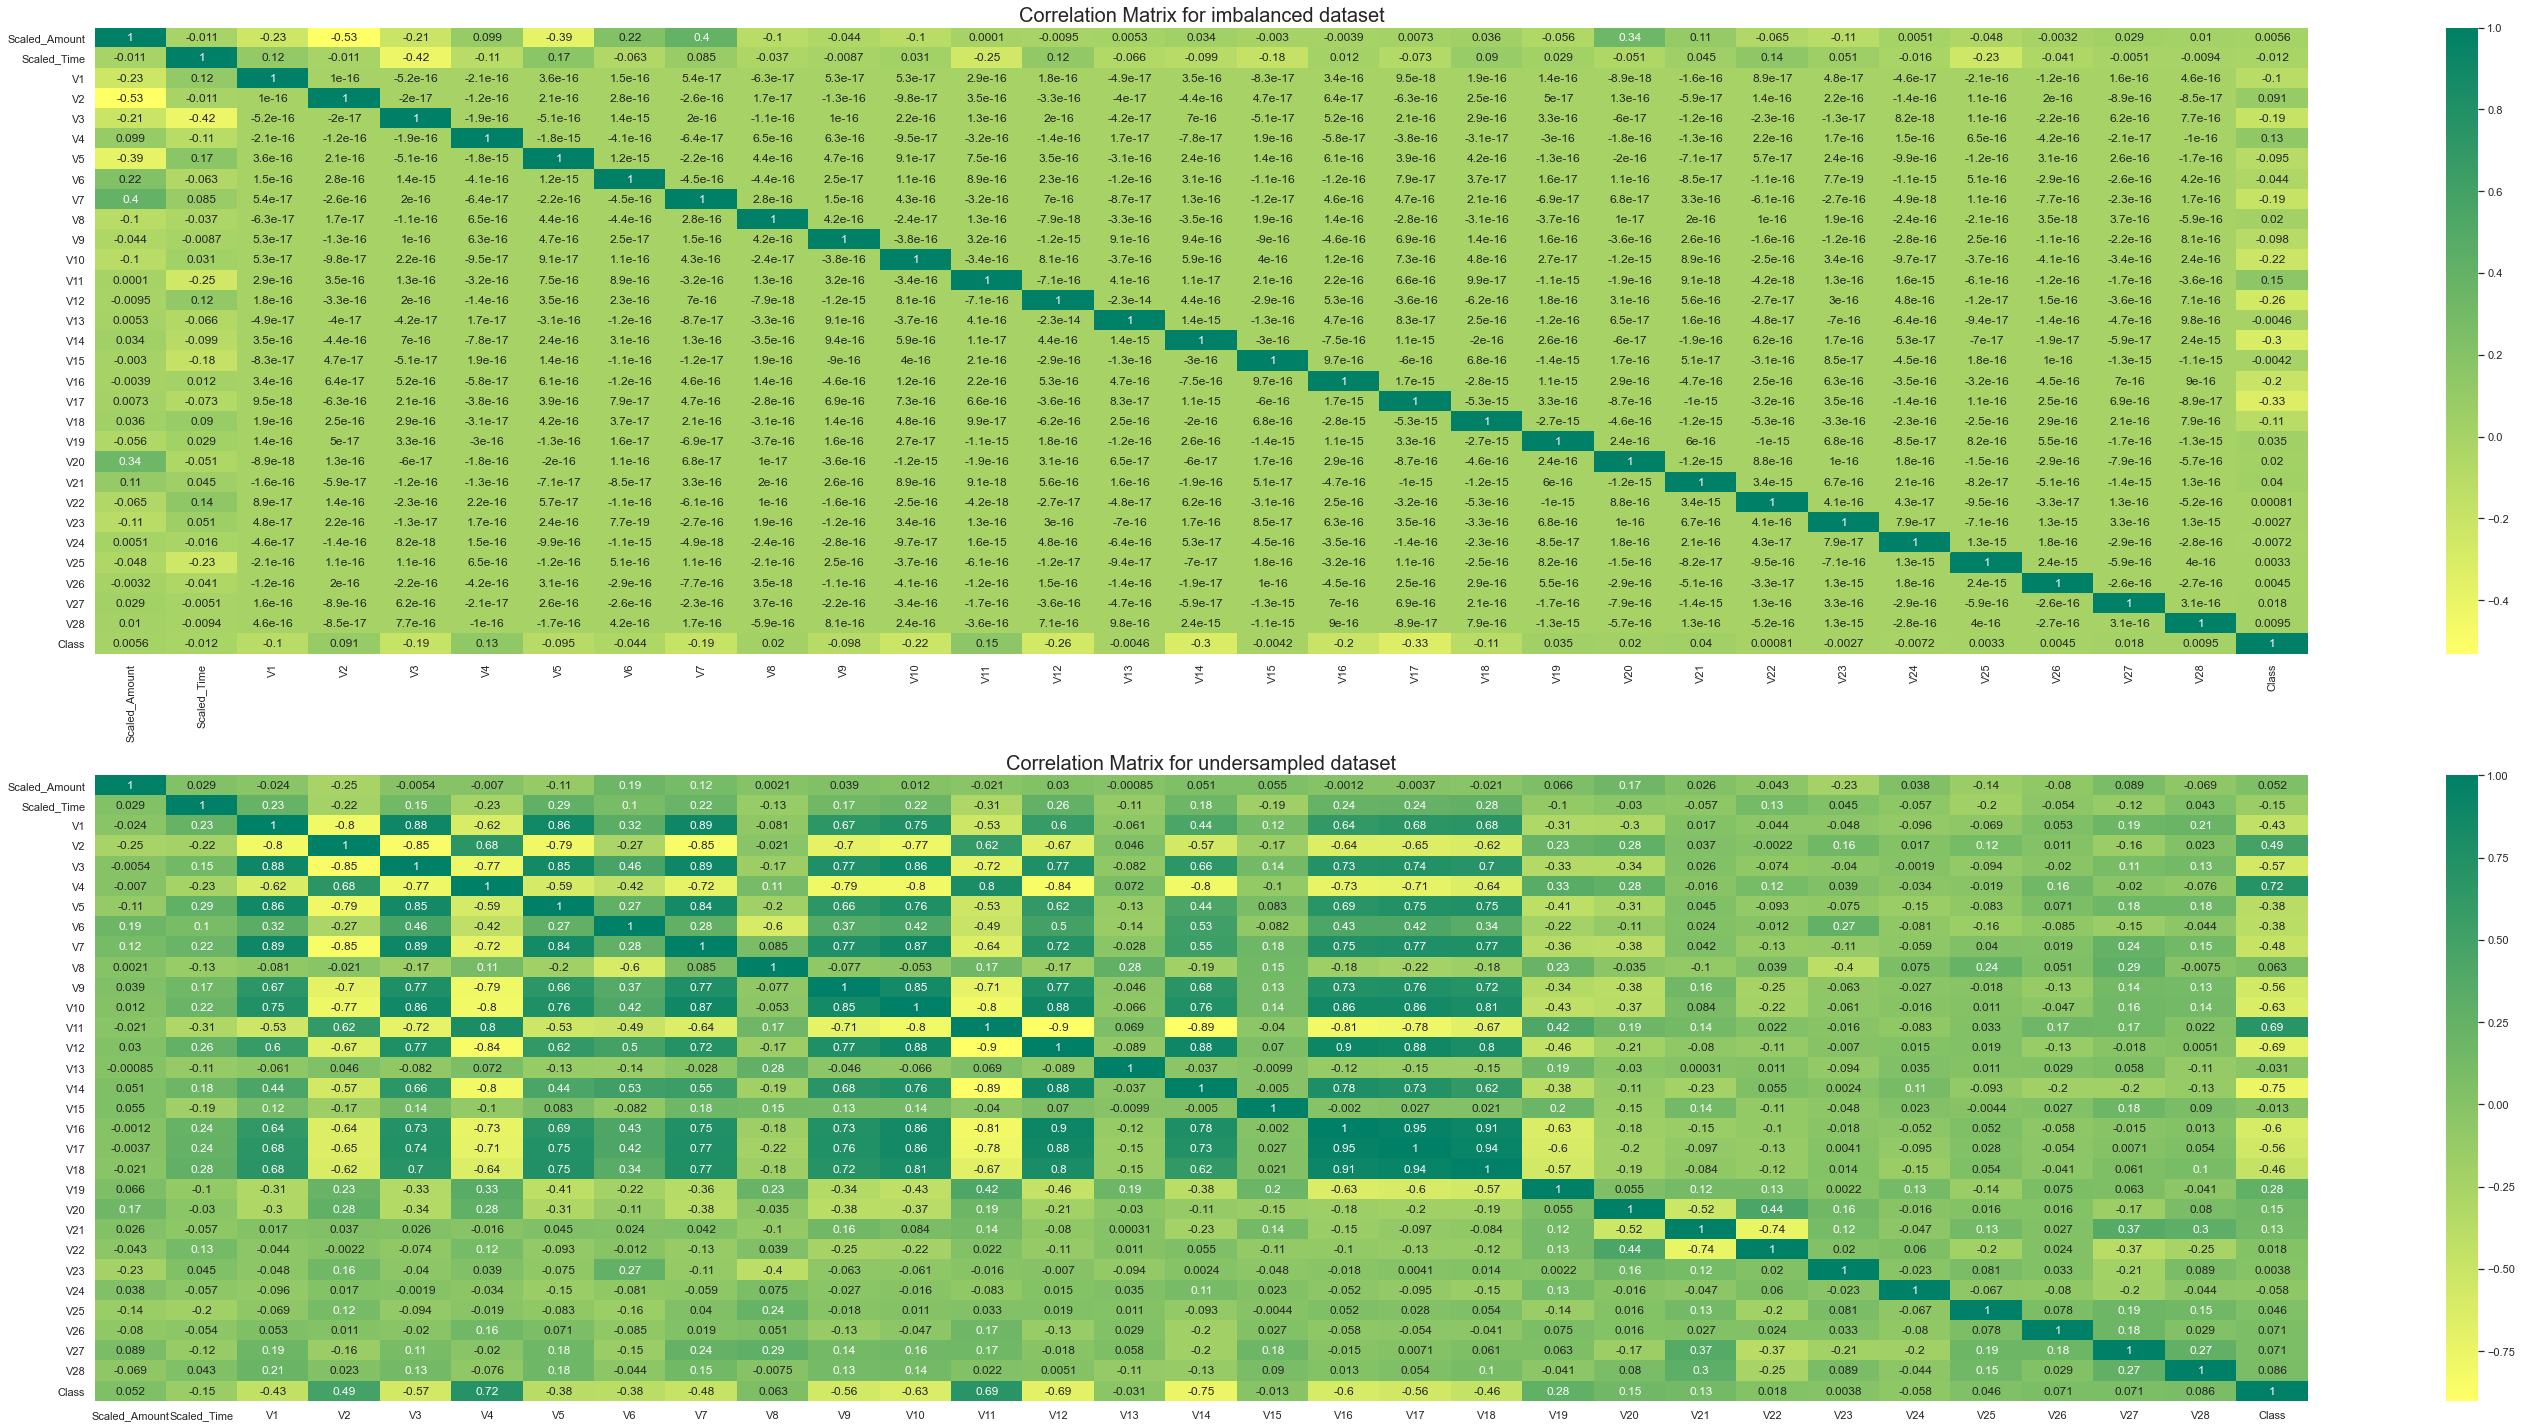

In [15]:
plt.figure(figsize=(40,20))
plt.subplot(211)
sns.heatmap(df.corr(),cmap='summer_r',annot=True)
plt.title('Correlation Matrix for imbalanced dataset',fontsize=20)
plt.tight_layout()
plt.subplot(212)
sns.heatmap(new_df.corr(),cmap='summer_r',annot=True)
plt.title('Correlation Matrix for undersampled dataset',fontsize=20)
plt.tight_layout()
plt.show()

* V17,V16,V14,V12,V10,V9 and V3 are negatively correlated.the lower these values are, the more likely the end result will be a fraud transaction. 
* V2, V4, V11 are positively correlated.the higher these values are, the more likely the end result will be a fraud transaction.

In [16]:
def box_swarm_plot(feature,data,ax):
    sns.boxplot(x='Class',y=feature,data=data,palette=['orange','blue'],ax=ax)
    sns.swarmplot(x='Class',y=feature,data=data,palette=['green','red'],ax=ax)
    ax.set_title('{} Classwise distrubution in undersampled dataset'.format(feature),fontsize=15)
    plt.tight_layout()

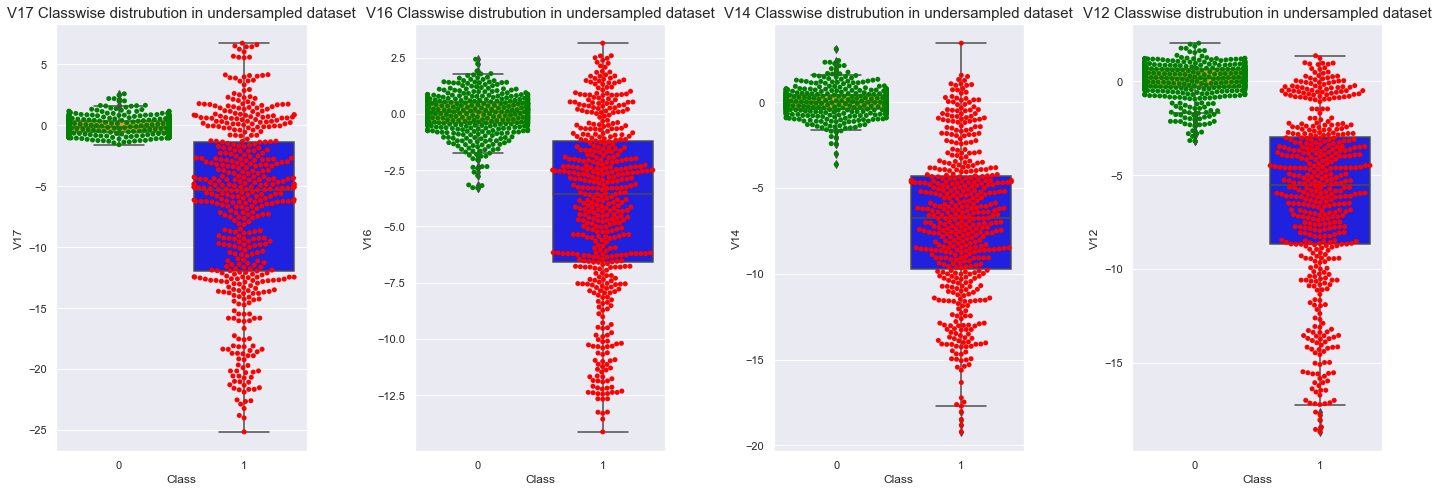

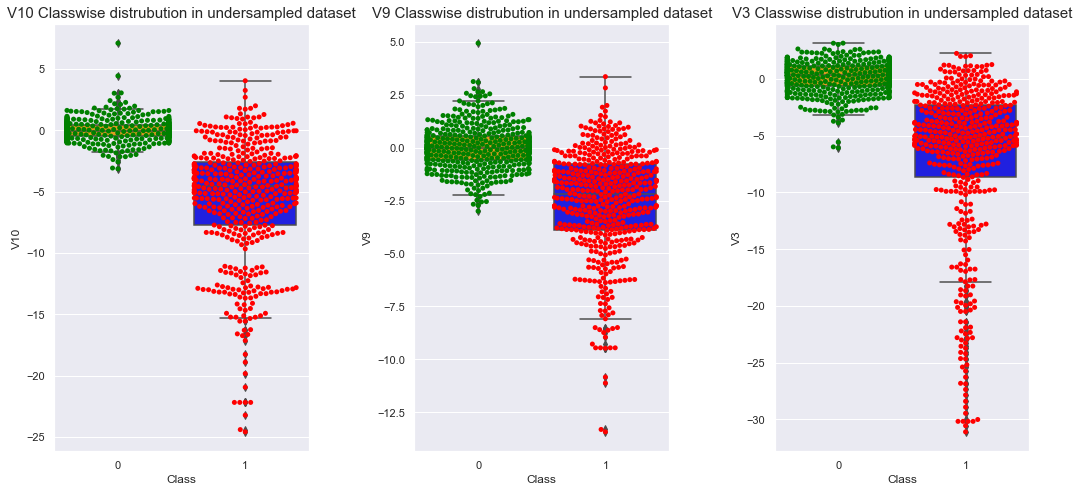

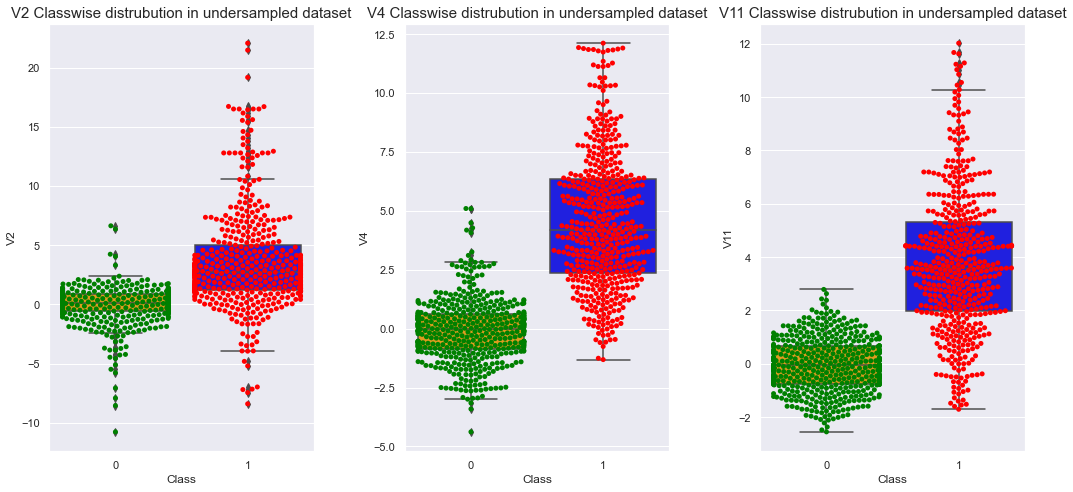

In [17]:
f,ax = plt.subplots(ncols=4,figsize=(20,7))
box_swarm_plot('V17',new_df,ax[0])
box_swarm_plot('V16',new_df,ax[1])
box_swarm_plot('V14',new_df,ax[2])
box_swarm_plot('V12',new_df,ax[3])

f,ax = plt.subplots(ncols=3,figsize=(15,7))
box_swarm_plot('V10',new_df,ax[0])
box_swarm_plot('V9',new_df,ax[1])
box_swarm_plot('V3',new_df,ax[2])

f,ax = plt.subplots(ncols=3,figsize=(15,7))
box_swarm_plot('V2',new_df,ax[0])
box_swarm_plot('V4',new_df,ax[1])
box_swarm_plot('V11',new_df,ax[2])

V14,V12 and V10 has highest correlation with class so outlier of these feature affect the accuracy very much so removing these outliers

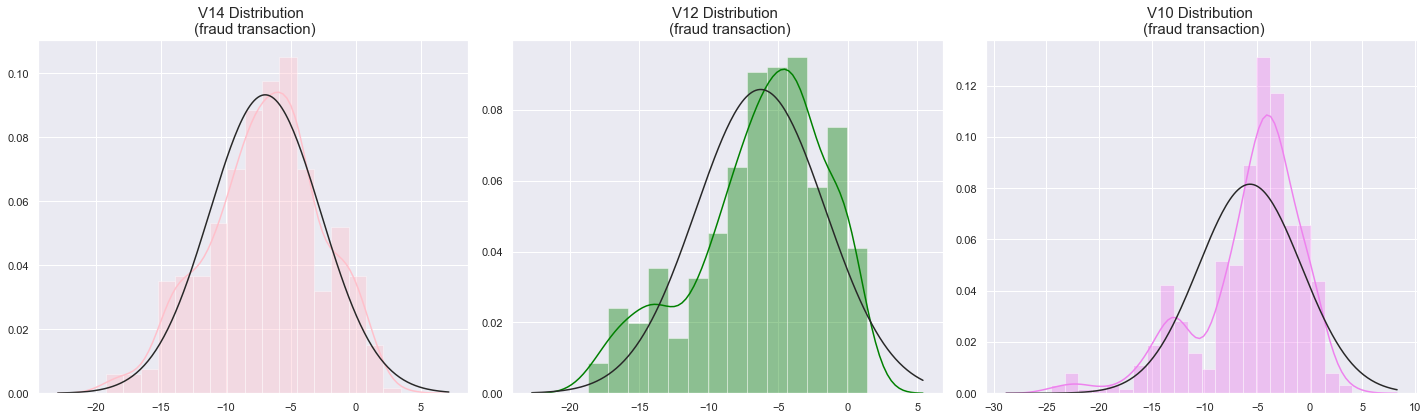

In [18]:
from scipy.stats import norm
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist,fit=norm,ax=ax1,color='pink')
ax1.set_title('V14 Distribution \n (fraud transaction)',fontsize=15)
plt.tight_layout()

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist,fit=norm,ax=ax2,color='green')
ax2.set_title('V12 Distribution \n (fraud transaction)',fontsize=15)
plt.tight_layout()

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist,fit=norm,ax=ax3,color='violet')
ax3.set_title('V10 Distribution \n (fraud transaction)',fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
v14_iqr = q75-q25
v14_cutoff = v14_iqr*1.5
v14_lower,v14_upper=q25-v14_cutoff,q75+v14_cutoff
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print('iqr: {}'.format(v14_iqr))
print('Cut Off: {}'.format(v14_cutoff))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
outliers = [x for x in new_df['V14'] if x>v14_upper or x<v14_lower]
print('# of v14 outliers: ',len(outliers))
print('v14 outliers: ',outliers)
new_df = new_df.drop(new_df[(new_df['V14']>v14_upper)| (new_df['V14']<v14_lower)].index)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
# of v14 outliers:  4
v14 outliers:  [-19.2143254902614, -18.4937733551053, -18.8220867423816, -18.049997689859396]


In [20]:
v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v12_iqr = q75-q25
v12_cutoff = v12_iqr*1.5
v12_lower,v12_upper=q25-v12_cutoff,q75+v12_cutoff
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print('iqr: {}'.format(v12_iqr))
print('Cut Off: {}'.format(v12_cutoff))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in new_df['V12'] if x>v12_upper or x<v12_lower]
print('# of v12 outliers: ',len(outliers))
print('v12 outliers: ',outliers)
new_df = new_df.drop(new_df[(new_df['V12']>v12_upper)| (new_df['V12']<v12_lower)].index)

Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
# of v12 outliers:  4
v12 outliers:  [-18.683714633344298, -18.4311310279993, -18.047596570821604, -18.553697009645802]


In [21]:
v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
v10_iqr = q75-q25
v10_cutoff = v10_iqr*1.5
v10_lower,v10_upper=q25-v10_cutoff,q75+v10_cutoff
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
print('iqr: {}'.format(v10_iqr))
print('Cut Off: {}'.format(v10_cutoff))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in new_df['V10'] if x>v10_upper or x<v10_lower]
print('# of v10 outliers: ',len(outliers))
print('v10 outliers: ',outliers)
new_df = new_df.drop(new_df[(new_df['V10']>v10_upper)| (new_df['V10']<v10_lower)].index)

Quartile 25: -7.466658535821848 | Quartile 75: -2.5118611381562523
iqr: 4.954797397665596
Cut Off: 7.4321960964983935
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
# of v10 outliers:  28
v10 outliers:  [7.095039318736889, -15.2399619587112, -14.9246547735487, -22.1870885620007, -23.2282548357516, -15.563791338730098, -24.5882624372475, -16.7460441053944, -15.563791338730098, -17.141513641289198, -14.9246547735487, -19.836148851696, -15.346098846877501, -18.9132433348732, -16.3035376590131, -18.2711681738888, -22.1870885620007, -16.6496281595399, -20.949191554361104, -16.2556117491401, -22.1870885620007, -15.1237521803455, -16.6011969664137, -15.2318333653018, -22.1870885620007, -15.2399619587112, -24.403184969972802, -15.124162814494698]


## boxplot for feature V14, V12, V10 after removing the outliers

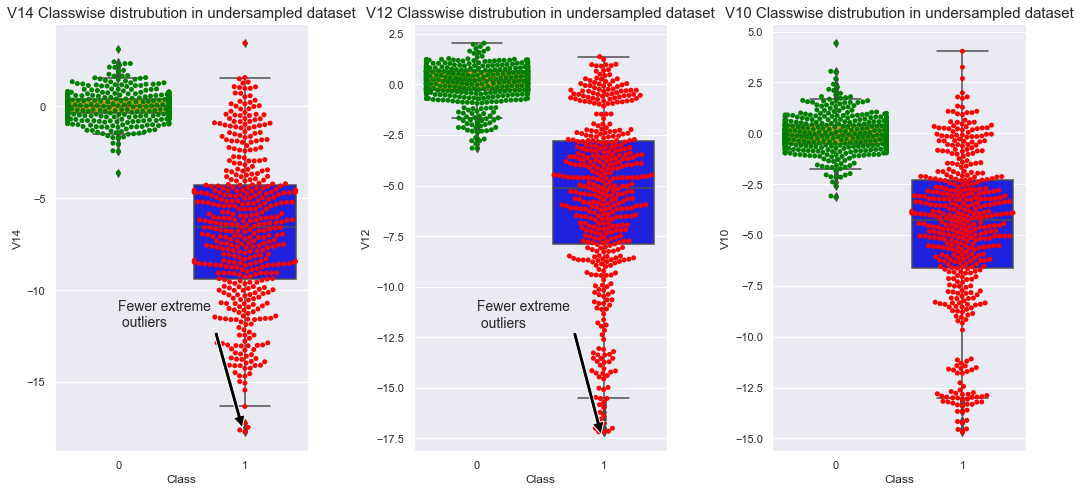

In [22]:
f,ax = plt.subplots(ncols=3,figsize=(15,7))
box_swarm_plot('V14',new_df,ax[0])
ax[0].annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
box_swarm_plot('V12',new_df,ax[1])
ax[1].annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
box_swarm_plot('V10',new_df,ax[2])
ax[2].annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
plt.show()

# Dimensionality Reduction and Clustering in undersampled dataset: 

In [23]:
X = new_df.drop(['Class'],axis=1)
y = new_df['Class']

In [24]:
# applying t-SNE algorithm

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print('t-SNE took {:.2}s'.format(t1-t0))

# applying PCA

t0 = time.time()
X_reduced_pca = PCA(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA took {:.2}s'.format(t1-t0))

# applying TruncatedSVD

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2,random_state=42).fit_transform(X.values)
t1 = time.time()
print('TruncatedSVD took {:.2}s'.format(t1-t0))

t-SNE took 7.2s
PCA took 0.34s
TruncatedSVD took 0.0086s


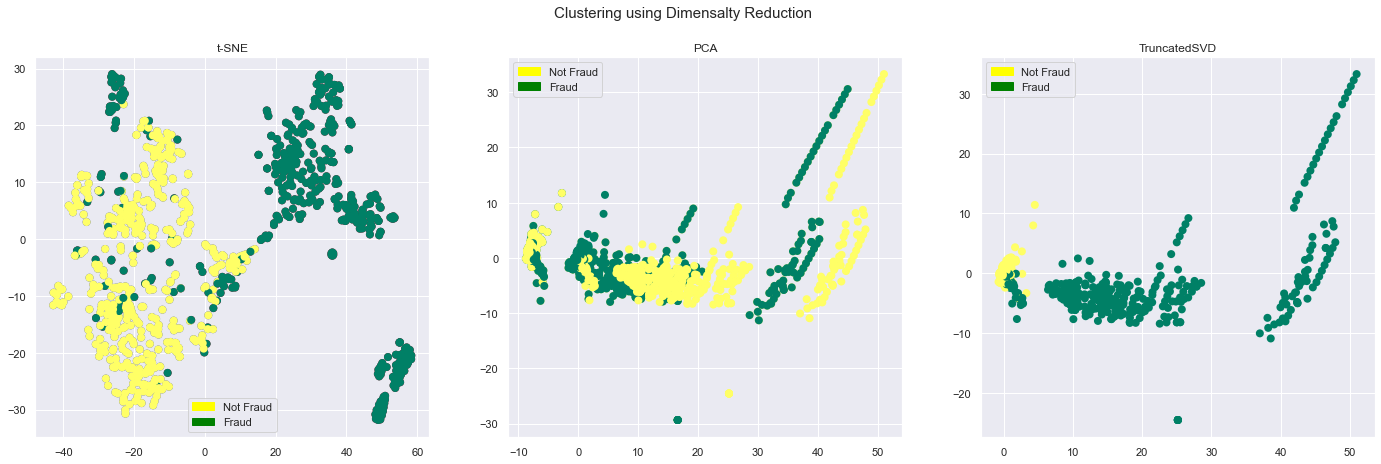

In [25]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,7))
f.suptitle('Clustering using Dimensalty Reduction',fontsize=15)
yellow_patch = mpatches.Patch(color='yellow',label='Not Fraud')
green_patch = mpatches.Patch(color='green',label='Fraud')

# tsne scatter plot
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==1),cmap='coolwarm',label='Not Fraud',linewidths=2)
ax1.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=(y==1),cmap='summer_r',label='Fraud',linewidths=2)
ax1.set_title('t-SNE')
ax1.grid(True)
ax1.legend(handles=[yellow_patch,green_patch])

# pca scatter plot
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(y==0),cmap='summer_r',label='Not Fraud',linewidths=2)
ax2.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(y==1),cmap='summer_r',label='Fraud',linewidths=2)
ax2.set_title('PCA')
ax2.grid(True)
ax2.legend(handles=[yellow_patch,green_patch])

# truncated scatter plot
ax2.scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(y==0),cmap='summer_r',label='Not Fraud',linewidths=2)
ax3.scatter(X_reduced_svd[:,0],X_reduced_svd[:,1],c=(y==1),cmap='summer_r',label='Fraud',linewidths=2)
ax3.set_title('TruncatedSVD')
ax3.grid(True)
ax3.legend(handles=[yellow_patch,green_patch])

plt.show()

* t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in the dataset. Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario. This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases

# Building Models

In [26]:
# undersampled data
X = new_df.drop(['Class'],axis=1)
y = new_df['Class']

In [27]:
#splitting undersampled data using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [29]:
classifiers = {"lr":LogisticRegression(n_jobs=-1),
               "knn":KNeighborsClassifier(n_jobs=-1),
               "svc":SVC(),
               "dtree":DecisionTreeClassifier()}

In [30]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_train)
    acc = accuracy_score(y_train,pred)
    print(classifier.__class__.__name__,'training accuracy score with train_test_split:',acc)

print('_ '*45,'\n')

from sklearn.model_selection import cross_val_score
for key,classifier in classifiers.items():
    training_score = cross_val_score(classifier,X_train,y_train,cv=5,n_jobs=-1)
    print(classifier.__class__.__name__,'training accuracy score with cross validation:',training_score.mean()*100)

LogisticRegression training accuracy score with train_test_split: 0.9564643799472295
KNeighborsClassifier training accuracy score with train_test_split: 0.9472295514511874
SVC training accuracy score with train_test_split: 0.9485488126649076
DecisionTreeClassifier training accuracy score with train_test_split: 1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

LogisticRegression training accuracy score with cross validation: 94.0606483095155
KNeighborsClassifier training accuracy score with cross validation: 93.79661903102127
SVC training accuracy score with cross validation: 93.66329731613803
DecisionTreeClassifier training accuracy score with cross validation: 91.81857790170793


* here it is clear from above two accuray score that decision tree overfitting the most
* Logistic Regression and KNN are preforming almost similar with cross validation

## using GridSearchCV to find out the best tuning parameter

In [31]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
lr_params = {"penalty":['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000),param_grid=lr_params,n_jobs=-1)
grid_lr.fit(X_train,y_train)
best_lr = grid_lr.best_estimator_

# KNN
knn_params = {'n_neighbors':list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=knn_params,n_jobs=-1)
grid_knn.fit(X_train,y_train)
best_knn = grid_knn.best_estimator_

# SVC
svc_params = {'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}
grid_svc = GridSearchCV(estimator=SVC(),param_grid=svc_params,n_jobs=-1)
grid_svc.fit(X_train,y_train)
best_svc = grid_svc.best_estimator_

# Decision Tree
dtree_params = {'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}
grid_dtree = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=dtree_params,n_jobs=-1)
grid_dtree.fit(X_train,y_train)
best_dtree = grid_dtree.best_estimator_

In [32]:
#applying models after finding best tunning params

lr_score = cross_val_score(best_lr, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(lr_score.mean() * 100, 2).astype(str) + '%')

knn_score = cross_val_score(best_knn, X_train, y_train, cv=5)
print('KNeighborClassifier Cross Validation Score: ', round(knn_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(best_svc, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

dtree_score = cross_val_score(best_dtree, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(dtree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.06%
KNeighborClassifier Cross Validation Score:  93.8%
Logistic Regression Cross Validation Score:  93.8%
Logistic Regression Cross Validation Score:  93.53%


* In the above process I have undersampled the data before cross validation which affects the validation set( or we can say data leakage case) so to avoid it I will undersample it during the cross validation that is  first spliting the data in train and validation set and then doing undersampling only on train set so that originality can be maintained in validation set.

In [33]:
# whole dataset, will undersample it during cross validation not before
undersample_X = df.drop('Class',axis=1)
undersample_y = df['Class']

for train_index,test_index in sss.split(undersample_X,undersample_y):
    print('Train:',train_index,'Test:',test_index)
    undersample_Xtrain,undersample_Xtest = undersample_X.iloc[train_index],undersample_X.iloc[test_index]
    undersample_ytrain,undersample_ytest = undersample_y.iloc[train_index],undersample_y.iloc[test_index]

print('_ '*45,'\n')    
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values


undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels, won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

print('_ '*45,'\n')

# undersampling the data during cross validating so that validation set not get affected

for train,test in sss.split(undersample_Xtrain,undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),best_lr)
    # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train],undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    
    undersample_accuracy.append(undersample_pipeline.score(org_Xtrain[test],org_ytrain[test]))
    undersample_precision.append(precision_score(org_ytrain[test],undersample_prediction))
    undersample_recall.append(recall_score(org_ytrain[test],undersample_prediction))
    undersample_f1.append(f1_score(org_ytrain[test],undersample_prediction))
    undersample_auc.append(roc_auc_score(org_ytrain[test],undersample_prediction))


Train: [ 53422  53653  54342 ... 284804 284805 284806] Test: [    0     1     2 ... 56966 56967 56968]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 53422  53653  54342 ... 113930 113931 113932]
Train: [     0      1      2 ... 284804 284805 284806] Test: [110416 110611 110953 ... 170895 170896 170897]
Train: [     0      1      2 ... 284804 284805 284806] Test: [162473 162805 164953 ... 228606 228830 230635]
Train: [     0      1      2 ... 228606 228830 230635] Test: [227841 227842 227843 ... 284804 284805 284806]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

NearMiss Label Distribution: Counter({0: 492, 1: 492})
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



In [34]:
# plotting LogisticRegression learning curve

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2,estimator3,estimator4,X,y,ylim=None,
                        cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1.0,5)):
    
    f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15),sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    # first estimator
    train_sizes,train_scores,test_scores=learning_curve(
                              estimator1,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax1.fill_between(train_sizes,train_scores_mean-train_scores_std,
                                              train_scores_mean+train_scores_std,alpha=0.1,color = "#ff9124")
    ax1.fill_between(train_sizes,test_scores_mean-test_scores_std,
                                              test_scores_mean+test_scores_std,alpha=0.1,color = "#2492ff")
    ax1.plot(train_sizes,train_scores_mean,'o-',color="#ff9124",label="Training Score score")
    ax1.plot(train_sizes,test_scores_mean,'o-',color="#2492ff",label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve",fontsize=14)
    ax1.set_xlabel('Training Size(m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc='best')
    
    # second estimator
    train_sizes,train_scores,test_scores=learning_curve(
                              estimator2,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax2.fill_between(train_sizes,train_scores_mean-train_scores_std,
                                              train_scores_mean+train_scores_std,alpha=0.1,color = "#ff9124")
    ax2.fill_between(train_sizes,test_scores_mean-test_scores_std,
                                              test_scores_mean+test_scores_std,alpha=0.1,color = "#2492ff")
    ax2.plot(train_sizes,train_scores_mean,'o-',color="#ff9124",label="Training Score score")
    ax2.plot(train_sizes,test_scores_mean,'o-',color="#2492ff",label="Cross-validation score")
    ax2.set_title("KNN Learning Curve",fontsize=14)
    ax2.set_xlabel('Training Size(m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc='best')
    
    # third estimator
    train_sizes,train_scores,test_scores=learning_curve(
                              estimator3,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax3.fill_between(train_sizes,train_scores_mean-train_scores_std,
                                              train_scores_mean+train_scores_std,alpha=0.1,color = "#ff9124")
    ax3.fill_between(train_sizes,test_scores_mean-test_scores_std,
                                              test_scores_mean+test_scores_std,alpha=0.1,color = "#2492ff")
    ax3.plot(train_sizes,train_scores_mean,'o-',color="#ff9124",label="Training Score score")
    ax3.plot(train_sizes,test_scores_mean,'o-',color="#2492ff",label="Cross-validation score")
    ax3.set_title("SVC Learning Curve",fontsize=14)
    ax3.set_xlabel('Training Size(m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc='best')

    # fourth estimator
    train_sizes,train_scores,test_scores=learning_curve(
                              estimator4,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax4.fill_between(train_sizes,train_scores_mean-train_scores_std,
                                              train_scores_mean+train_scores_std,alpha=0.1,color = "#ff9124")
    ax4.fill_between(train_sizes,test_scores_mean-test_scores_std,
                                              test_scores_mean+test_scores_std,alpha=0.1,color = "#2492ff")
    ax4.plot(train_sizes,train_scores_mean,'o-',color="#ff9124",label="Training Score score")
    ax4.plot(train_sizes,test_scores_mean,'o-',color="#2492ff",label="Cross-validation score")
    ax4.set_title("Decision Tree Learning Curve",fontsize=14)
    ax4.set_xlabel('Training Size(m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc='best')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ravik\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

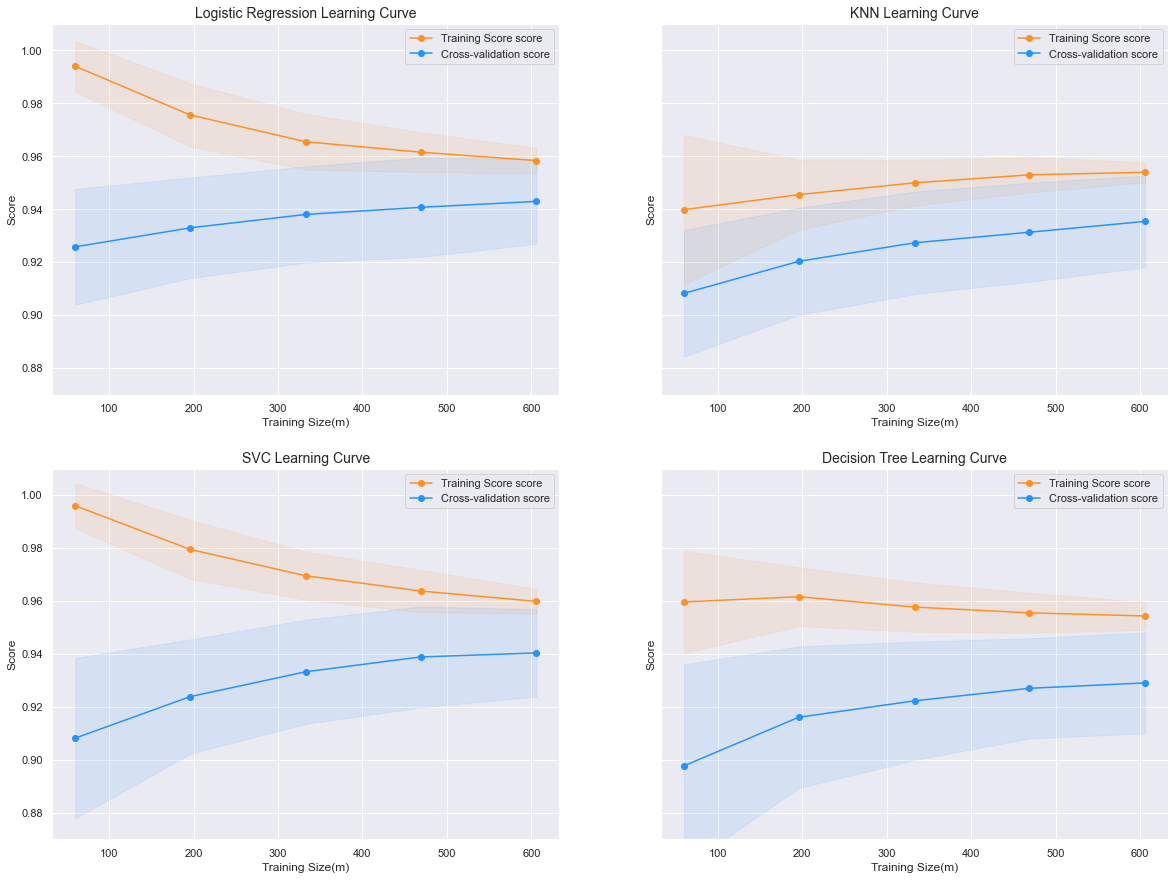

In [35]:
cv = ShuffleSplit(n_splits = 100, test_size = 0.2,random_state=42)
plot_learning_curve(best_lr,best_knn,best_svc,best_dtree,X_train,y_train,(0.87,1.01),cv=cv,n_jobs=-1)

In [36]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

lr_pred = cross_val_predict(best_lr,X_train,y_train,cv=5,method='decision_function')
knn_pred = cross_val_predict(best_knn,X_train,y_train,cv=5)
svc_pred = cross_val_predict(best_svc,X_train,y_train,cv=5,method='decision_function')
dtree_pred = cross_val_predict(best_dtree,X_train,y_train,cv=5)

In [37]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression: ',roc_auc_score(y_train,lr_pred))
print('KNN:                 ',roc_auc_score(y_train,knn_pred))
print('SVC:                 ',roc_auc_score(y_train,svc_pred))
print('Decision Tree:       ',roc_auc_score(y_train,dtree_pred))

Logistic Regression:  0.9708400736319518
KNN:                  0.9356487421208233
SVC:                  0.97118870976739
Decision Tree:        0.9343657611424109


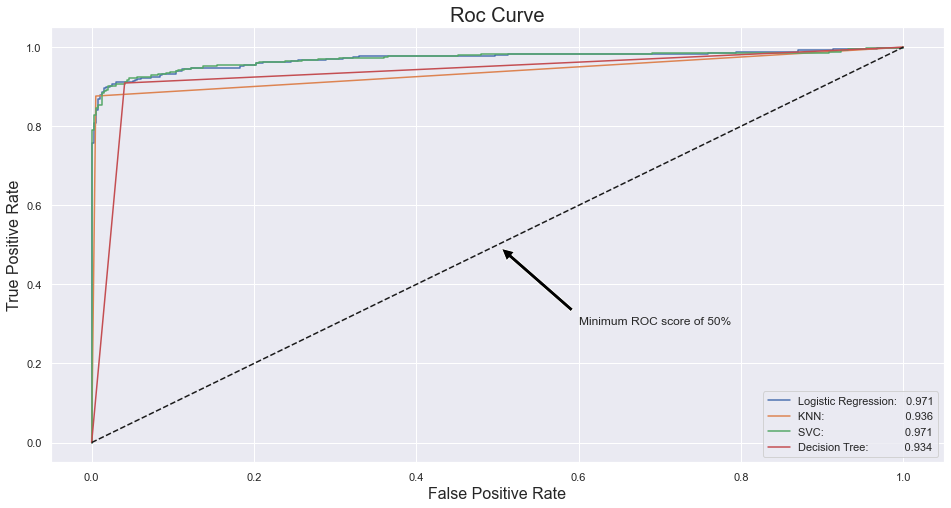

In [38]:
lr_fpr,lr_tpr,lr_threshold = roc_curve(y_train,lr_pred)
knn_fpr,knn_tpr,knn_threshold = roc_curve(y_train,knn_pred)
svc_fpr,svc_tpr,svc_threshold = roc_curve(y_train,svc_pred)
dtree_fpr,dtree_tpr,dtree_threshold = roc_curve(y_train,dtree_pred)

def multi_roc_curve(lr_fpr,lr_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,dtree_fpr,dtree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Roc Curve',fontsize=20)
    plt.plot(lr_fpr,lr_tpr,label="Logistic Regression:   {}".format(round(roc_auc_score(y_train,lr_pred),3)))
    plt.plot(knn_fpr,knn_tpr,label="KNN:                           {}".format(round(roc_auc_score(y_train,knn_pred),3)))
    plt.plot(svc_fpr,svc_tpr,label="SVC:                           {}".format(round(roc_auc_score(y_train,svc_pred),3)))
    plt.plot(dtree_fpr,dtree_tpr,label="Decision Tree:            {}".format(round(roc_auc_score(y_train,dtree_pred),3)))
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)
    plt.annotate('Minimum ROC score of 50%',xy=(0.5,0.5),
                 xytext=(0.6,0.3),arrowprops = dict(facecolor='black',shrink=0.05),)
    plt.legend(loc='best')
    plt.show()
    
multi_roc_curve(lr_fpr,lr_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,dtree_fpr,dtree_tpr)

In [39]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold = precision_recall_curve(y_train,lr_pred)

In [40]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
y_pred = best_lr.predict(X_train)

# overfitting case
print('---'*45)
print('overfitting case: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
overfitting case: 

Recall Score: 0.93
Precision Score: 0.68
F1 Score: 0.79
Accuracy Score: 0.76
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.63
Precision Score: 0.00
Recall Score: 0.42
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [41]:
undersample_y_score = best_lr.decision_function(org_Xtest)

In [42]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(org_ytest,undersample_y_score)
print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.02


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.02')

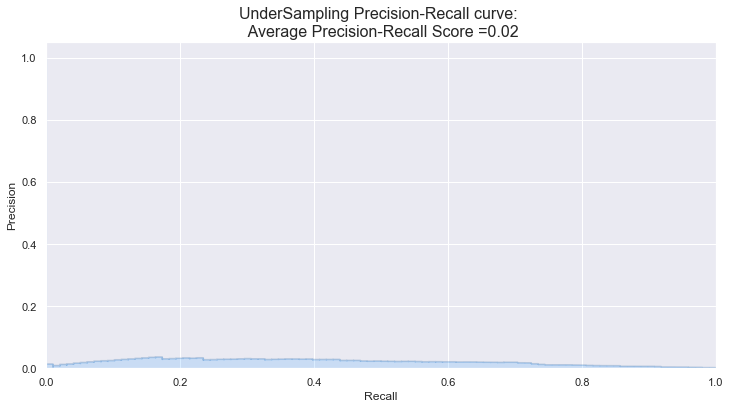

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(org_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

 # SMOTE Technique (Over-Sampling):
 * Synthetic Minority Over-sampling Technique.

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(org_Xtrain), len(org_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(org_Xtest), len(org_ytest)))

accuracy = []
precision = []
recall = []
f1 = []
auc = []

lr_sm = LogisticRegression(n_jobs=-1,max_iter=1000)
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_lr = RandomizedSearchCV(LogisticRegression(max_iter=1000,n_jobs=-1), lr_params, n_iter=4,n_jobs=-1)

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in sss.split(org_Xtrain, org_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_lr) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(org_Xtrain[train], org_ytrain[train])
    best_est = rand_lr.best_estimator_
    prediction = best_est.predict(org_Xtrain[test])
    
    accuracy.append(pipeline.score(org_Xtrain[test], org_ytrain[test]))
    precision.append(precision_score(org_ytrain[test], prediction))
    recall.append(recall_score(org_ytrain[test], prediction))
    f1.append(f1_score(org_ytrain[test], prediction))
    auc.append(roc_auc_score(org_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9446298952614539
precision: 0.06255548168503525
recall: 0.9162934112301201
f1: 0.11526922895571468
---------------------------------------------------------------------------------------------------------------------------------------


In [45]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(org_Xtest)
print(classification_report(org_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [46]:
y_score = best_est.decision_function(org_Xtest)
avg_precision = average_precision_score(org_ytest,y_score)

print('Average precision-recall score: {0:0.2f}'.format(avg_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

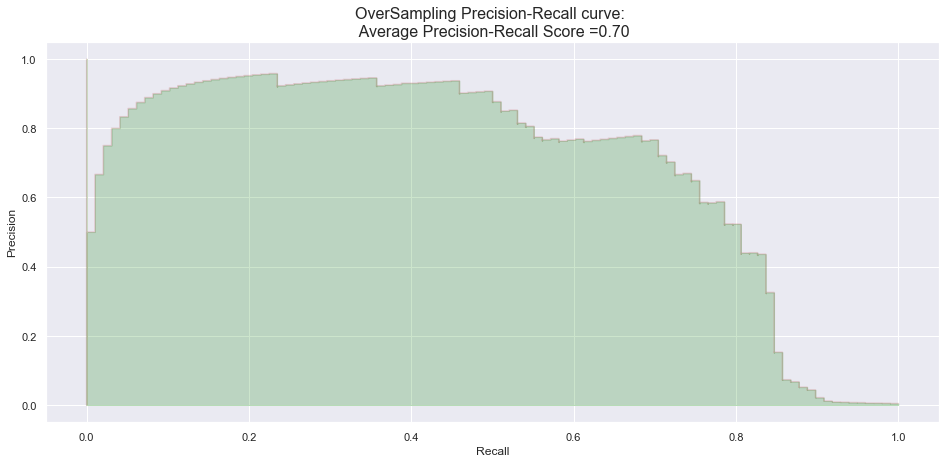

In [47]:
fig = plt.figure(figsize=(16,7))

precision, recall,_ = precision_recall_curve(org_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(avg_precision), fontsize=16)

In [48]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were which is going to be use 
Xsm_train, ysm_train = sm.fit_sample(org_Xtrain, org_ytrain)

In [49]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
lr_sm = rand_lr.best_estimator_
lr_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :28.470379114151 sec


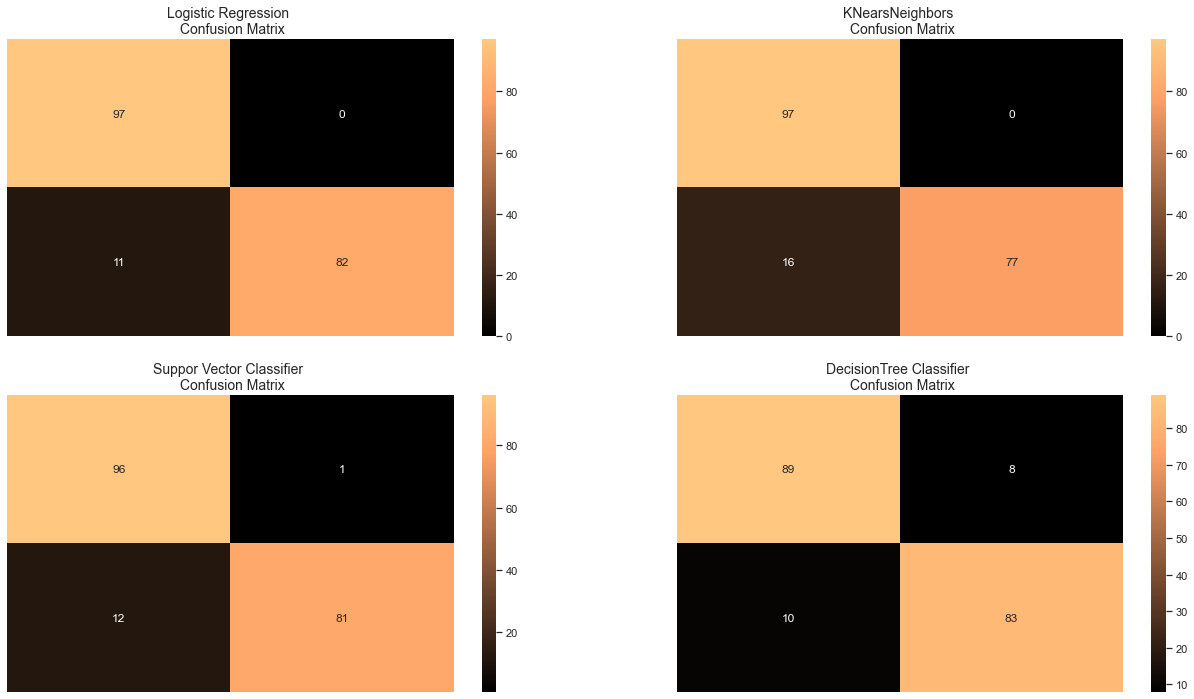

In [50]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_lr = lr_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knn = best_knn.predict(X_test)
y_pred_svc = best_svc.predict(X_test)
y_pred_dtree = best_dtree.predict(X_test)


lr = confusion_matrix(y_test, y_pred_lr)
knn = confusion_matrix(y_test, y_pred_knn)
svc = confusion_matrix(y_test, y_pred_svc)
dtree = confusion_matrix(y_test, y_pred_dtree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(lr, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knn, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(dtree, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [51]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knn))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_dtree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        97
           1       1.00      0.88      0.94        93

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        97
           1       1.00      0.83      0.91        93

    accuracy                           0.92       190
   macro avg       0.93      0.91      0.91       190
weighted avg       0.93      0.92      0.92       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        97
           1       0.99      0.87      0.93        93

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted

In [52]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = best_lr.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = lr_sm.predict(org_Xtest)
oversample_score = accuracy_score(org_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.757895
1,Oversampling (SMOTE),0.988589
